# Midterm Answer Script

**Name**: Ferdous Zeaul Islam  
**ID**: 173 1136 042  

**Course**: CSE445 (Machine Learning)  
**Faculty**: Dr. Sifat Momen (Sfm1)  
**Section**: 01  
**Semester**: Spring 2021  

In [1]:
# only need this line in jupyter
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## (a) Read the dataset (which is in the csv format) using panda's dataframe.  


In [2]:
diabetes_df = pd.read_csv('./diabetes.csv')
diabetes_df.shape

(768, 9)

  
## (b) Find out the number of instances and the number of features (including the target class) in the dataset.  


In [6]:
print('Number of instances in the dataset =', diabetes_df.shape[0])

Number of instances in the dataset = 768


In [7]:
print('Number of features in the dataset =', diabetes_df.shape[1])

Number of features in the dataset = 9


## (c) Does the dataset have any missing entries? Show your workings.  


In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Explanation:
We can observe from the command on the previous line that all columns/features of the dataset have non-null count equal to the total number of instances that we found on on Question(b). Therefore, we can state that **to the naked eye there are no missing entries in this dataset.**  


## (d) Here “Outcome” is the target class and contains values zeros or ones. Determine how many instances have the outcome values zeroes and how many have the outcome values ones. Hence or otherwise, comment on whether this dataset suffers from class imbalance problem.

In [42]:
outcome_freq = diabetes_df.Outcome.value_counts()
outcome_freq

0    500
1    268
Name: Outcome, dtype: int64

In [26]:
num_total_instances = diabetes_df.shape[0]
num_outcome_zero = outcome_freq[0]
num_outcome_one = outcome_freq[1]

In [44]:
outcome_zero_data_percentage = round((num_outcome_zero*100)/num_total_instances, 3)
print('Percentage of data with outcome zero =', outcome_zero_data_percentage)

Percentage of data with outcome zero = 65.104


In [40]:
outcome_one_data_percentage = round((num_outcome_one*100)/num_total_instances, 3)
print('Percentage of data with outcome one =', outcome_one_data_percentage)

Percentage of data with outcome one = 34.896


### Explanation:
With respect to "Outcome" we see that there are **65.104% data with value one** and remaining **34.896% data with value zero**. Clearly, **the dataset suffers from class imbalance.**  

## (e) Show the first 5 and the last 5 instances of the dataset.

In [45]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## (f) Often, in many datasets, it may appear that there exists no missing entries. However, when you look at the dataset closely, it is often found that the missing entries are replaced by a zero (0). Check if this dataset has this issue or not. Show and explain your workings.

In [47]:
diabetes_df[30:35]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
30,5,109,75,26,0,36.0,0.546,60,0
31,3,158,76,36,245,31.6,0.851,28,1
32,3,88,58,11,54,24.8,0.267,22,0
33,6,92,92,0,0,19.9,0.188,28,0
34,10,122,78,31,0,27.6,0.512,45,0


In [52]:
diabetes_df[342:347]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
342,1,0,68,35,0,32.0,0.389,22,0
343,5,122,86,0,0,34.7,0.290,33,0
344,8,95,72,0,0,36.8,0.485,57,0
345,8,126,88,36,108,38.5,0.349,49,0
346,1,139,46,19,83,28.7,0.654,22,0


In [55]:
diabetes_df[706:711]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
706,10,115,0,0,0,0.0,0.261,30,1
707,2,127,46,21,335,34.4,0.176,22,0
708,9,164,78,0,0,32.8,0.148,45,1
709,2,93,64,32,160,38.0,0.674,23,1
710,3,158,64,13,387,31.2,0.295,24,0


In [113]:
diabetes_df[(diabetes_df['DiabetesPedigreeFunction'] == 0)].shape[0]

0

In [112]:
diabetes_df[(diabetes_df['Age'] == 0)].shape[0]

0

### Explanation- 
Apart from the 'Pregnancy' and 'Outcome' columns any other column with the value 0 is non-sensical. By printing various segments of the data we see that some instances have 0 value for columns- 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'. So we can state that, **there are missing datas replaced with 0 in this dataset.** Further calculations are shown below,

In [115]:
missing_data_count = diabetes_df[ (diabetes_df['Glucose']==0) | (diabetes_df['BloodPressure']==0) | (diabetes_df['BMI']==0) 
                           | (diabetes_df['Insulin']==0) | (diabetes_df['SkinThickness']==0) ].shape[0]

print('A total of', missing_data_count, 'instances have missing data (one or more columns invalidly contain zero).')


A total of 376 instances have missing data (one or more columns invalidly contain zero).


## (g) Draw a histogram for each numerical features. You may use the hist() function of the panda's dataframe. Documentation on this can be found at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html  
### In order to make the histograms for each features visually appealing, you are advised to tweak bins and figsize parameters.

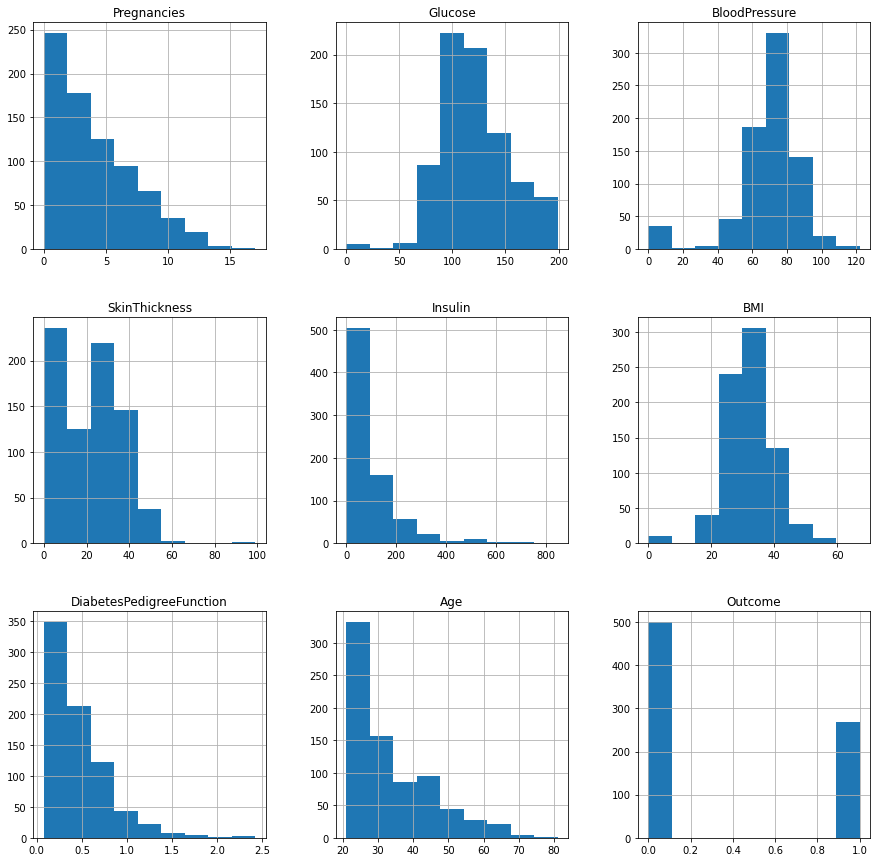

In [110]:
diabetes_df.hist(bins = 9, figsize = (15, 15))
plt.show()